<div align="center"><a href="https://colab.research.google.com/github/institutohumai/talleres/blob/master/Taller_automatizacion_con_python.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg'/> </a> <br> Recordá abrir en una nueva pestaña </div>

<h1><center><b>✨ Taller de automatización con Python ✨</b></center></h1>

## [Instituto Humai](https://humai.com.ar/)
### Conocé lo que hacemos y nuestra oferta de cursos entrando a https://humai.com.ar/

#### Dictado por [Gustavo Juantorena](https://www.linkedin.com/in/gustavo-juantorena/?)

# Automatización II: outputs, envío de mail, volcado a GSheets, scheduling

### Hoja de ruta

-   Ejemplo scrapeo sencillo				
-   Uso de la API de *Google Sheets*.							
-   Ejemplo envío automático de mail con *smtplib*.
-   Generación de reportes automáticos con python-docx
-   Extraccion de datos y generación de PDFs
-   Scheduling: cron para Mac y linux, GUI en Windows.					

## Scrapping básico


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://investing.com/crypto/"

# Hacemos un pedido a la pagina
res = requests.get(url)

# "Parseamos" la infomacion recibida
soup = BeautifulSoup(res.text, 'html.parser')

# Extraemos la tabla con datos
tabla = soup.find_all('table')
tabla[0]

# Creamos un DataFrame de Pandas
df = pd.read_html(str(tabla))[0]
df

In [ ]:
# Limpieza
df.drop(['#',	'Unnamed: 1'], axis=1, inplace=True)
df['Price (USD)'] = df['Price (USD)'].astype(float).round(2)

df

In [ ]:
# Grafico
df.sort_values(by=['Price (USD)'], inplace=True)
plt.barh(df['Symbol'], df['Price (USD)'])
plt.xscale('log')
plt.title('Precio de criptos')
plt.xlabel('Precio (USD). Escala logaritmica')
plt.savefig('precio_criptos.png')

## Limpiamos y convertimos a DataFrame

## **Vinculación con Google Drive**

Para poder escribir/leer un archivo que se encuentra en *Google Drive*, será necesario primero, contar con un archivo de *autenticación* a su vez que compartir el archivo pertinente con el servicio creado desde Python.

#### Generación de archivo de autenticación. (Conexión local)

Para ello entraremos en el siguiente [link](https://console.cloud.google.com/apis/) ingresando con la cuenta de google que querramos vincular. Una vez dentro de la plataforma de Google Cloud, crearemos un proyecto. Una vez dentro del proyecto entraremos en la sección **API y servicios** y daremos click en la opción **habilitar API y servicio**.

  <img src="https://unket.s3.sa-east-1.amazonaws.com/static/gcp1.png" alt="drawing" width="500"/>

Allí dentro seleccionaremos el tipo de API que estemos necesitando. En este caso la de Google Drive y Google Sheets. Una vez habilitada la API dentro de nuestro proyecto, iremos a la sección de **credenciales**, y dentro de la misma daremos click a **crear credenciales**. Seleccionamos la opción de *Cuenta de servicio*. Una vez que la *Cuenta de servicio* haya sido generada, será posible acceder a sus configuraciones y generar una clave en formato json dentro de la misma.

<img src="https://unket.s3.sa-east-1.amazonaws.com/static/gcp2.png" alt="drawing" width="500" height="300"/> <img src="https://unket.s3.sa-east-1.amazonaws.com/static/clave2.png" alt="drawing" width="500"/>

Más información sobre como crear un proyecto y habilitar una API [aquí](https://developers.google.com/workspace/guides/create-project)

In [17]:
# Esta funcion incluye todo lo que hicios antes, para poder actualizar nuestro DataFrame
def cripto_scraper():
  """Scraper de la pagina 
  Obtiene los datos, los limpia y los devuelve como un DataFrame de Pandas.
  """
  url = "https://investing.com/crypto/"
  res = requests.get(url)
  soup = BeautifulSoup(res.text, 'html.parser')

  tabla = soup.find_all('table')
  tabla[0]
  df = pd.read_html(str(tabla))[0]

  # limpieza
  df.drop(['#',	'Unnamed: 1'], axis=1, inplace=True)
  df['Price (USD)'] = df['Price (USD)'].astype(float).round(2)

  # Grafica
  df.sort_values(by=['Price (USD)'], inplace=True)
  plt.barh(df['Symbol'], df['Price (USD)'])
  plt.xscale('log')

  return df

,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D)
9,Dogecoin,DOGE,0.06,$8.39B,$283.11M,0.43%,-0.58%,-8.32%
6,XRP,XRP,0.33,$16.33B,$875.33M,1.34%,+0.47%,-4.42%
7,Cardano,ADA,0.45,$15.24B,$521.95M,0.80%,+1.66%,-2.93%
2,Tether,USDT,1.00,$67.56B,$45.28B,69.42%,0%,+0.01%
3,USD Coin,USDC,1.00,$52.19B,$6.47B,9.92%,-0.02%,-0.02%
5,Binance USD,BUSD,1.00,$19.21B,$6.37B,9.77%,-0.01%,+0.03%
8,Solana,SOL,32.09,$11.28B,$769.12M,1.18%,+1.09%,-10.05%
4,BNB,BNB,286.00,$46.33B,$939.41M,1.44%,+1.06%,-4.13%
1,Ethereum,ETH,1554.35,$190.87B,$18.79B,28.81%,+2.88%,-4.97%
0,Bitcoin,BTC,20129.60,$386.82B,$32.10B,49.21%,+0.22%,-6.36%


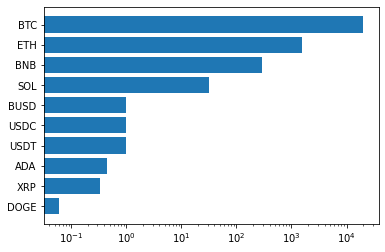

In [18]:
df = cripto_scraper()
df

,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D)
9,Dogecoin,DOGE,0.06,$8.39B,$283.11M,0.43%,-0.55%,-8.32%
6,XRP,XRP,0.33,$16.33B,$875.33M,1.34%,+0.49%,-4.42%
7,Cardano,ADA,0.45,$15.24B,$521.95M,0.80%,+0.92%,-2.93%
2,Tether,USDT,1.00,$67.56B,$45.28B,69.42%,+0.01%,+0.01%
3,USD Coin,USDC,1.00,$52.19B,$6.47B,9.92%,-0.02%,-0.02%
5,Binance USD,BUSD,1.00,$19.21B,$6.37B,9.77%,-0.01%,+0.03%
8,Solana,SOL,32.09,$11.28B,$769.12M,1.18%,+1.09%,-10.05%
4,BNB,BNB,286.00,$46.33B,$939.41M,1.44%,+1.06%,-4.13%
1,Ethereum,ETH,1554.35,$190.87B,$18.79B,28.81%,+2.88%,-4.97%
0,Bitcoin,BTC,20129.60,$386.82B,$32.10B,49.21%,+0.22%,-6.36%


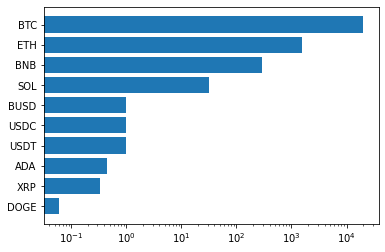

In [19]:
df = cripto_scraper()
df

### Usando gspread para interactuar con las hojas de cálculo de Google

Documentación: https://docs.gspread.org/en/v5.3.0/


In [8]:
# Instalamos y hacemos un upgrade de gspread porque la funcion que necesitamos esta a partir de la version 3.6
!pip install gspread --upgrade -q

Importamos la libreria gspread y chequeamos la version 

In [9]:
import gspread
print(f'Version de gspread:{gspread.__version__}')

Version de gspread:5.4.0


#### Interactuamos con Google Sheets.

Creamos una nueva hoja de calculo con su debido título y la compartimos con la cuenta desde la cual querramos acceder.

**Autenticación local**
* Documentación: https://docs.gspread.org/en/latest/oauth2.html

In [71]:
# Para no dejar en el codigo mis credenciales
# Leo mis credenciales de un archivo con primera fila "usuario" y segunda fila "contraseña"

with open('credenciales.txt') as f:
  lines = f.readlines()

usuario = lines[0].strip()
contrasena = lines[1].strip()

In [23]:
# Paso 1: Accedemos a nuestra cuenta y creamos la hoja de calculo
MAIL = usuario # asd@mail.com
NOMBRE_DE_CLAVE = 'clave_taller.json'
gc = gspread.service_account(filename=f'/content/{NOMBRE_DE_CLAVE}')

nombre = 'prueba_taller_2'
hoja_de_calculo = gc.create(nombre)

# Para hacer visible el archivo es necesario compartirlo
hoja_de_calculo.share(MAIL, perm_type='user', role='writer')

In [12]:
# Paso 2: Compartir la hoja con el 'client_email' que viene en el json
# Para eso simplemente abrimos nuestra hoja, vamos a 'Compartir' y ahi agregamos el mail que encontramos 
#en el json como si fuera un usuario mas

In [15]:
df

,#,Unnamed: 1,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D)
9,10,NaN,Dogecoin,DOGE,0.063098,$8.42B,$286.67M,0.44%,-0.13%,-7.78%
6,7,NaN,XRP,XRP,0.328630,$16.37B,$877.85M,1.34%,+0.71%,-4.02%
7,8,NaN,Cardano,ADA,0.451000,$15.27B,$526.62M,0.80%,+2.07%,-2.27%
3,4,NaN,USD Coin,USDC,0.999900,$52.19B,$6.50B,9.91%,-0.01%,-0.02%
5,6,NaN,Binance USD,BUSD,1.000000,$19.21B,$6.39B,9.74%,0%,-0.01%
2,3,NaN,Tether,USDT,1.000100,$67.55B,$45.49B,69.33%,0%,+0.01%
8,9,NaN,Solana,SOL,32.220000,$11.32B,$781.69M,1.19%,+1.82%,-9.03%
4,5,NaN,BNB,BNB,286.700000,$46.48B,$945.09M,1.44%,+1.31%,-3.38%
1,2,NaN,Ethereum,ETH,1558.340000,$191.74B,$18.98B,28.92%,+4.10%,-3.84%
0,1,NaN,Bitcoin,BTC,20178.400000,$388.74B,$32.23B,49.13%,+0.46%,-5.59%


In [26]:
# Paso 3: Abrimos accedemos al documento 
# Abrimos el documento
hoja_de_calculo = gc.open(nombre)

# Agarramos la primera de las hojas 
worksheet = hoja_de_calculo.sheet1

# Actualizo la hoja
worksheet.update([df.columns.values.tolist()] + df.values.tolist())

{'spreadsheetId': '1bmsJdJX3iAyurjGb82Ti4gkpJb_6ZefClH-KBaYIPaU',
 'updatedRange': 'Sheet1!A1:I11',
 'updatedRows': 11,
 'updatedColumns': 9,
 'updatedCells': 99}

In [ ]:
# Para testear que se actualiza con nuevos datos
df['pruebas'] = 2

In [27]:
# Paso 4: Obtenemos los valores desde nuestra hoja de calculo

nuestra_hoja = worksheet.get_all_values()

# Cargamos con Pandas
df_aux = pd.DataFrame(nuestra_hoja)
# df_aux.columns = df_aux.iloc[0,:]
# df_aux = df_aux.iloc[1:,:]
df_aux.head()

,0,1,2,3,4,5,6,7,8
0,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),pruebas
1,Dogecoin,DOGE,0.06,$8.39B,$283.11M,0.43%,-0.55%,-8.32%,2
2,XRP,XRP,0.33,$16.33B,$875.33M,1.34%,+0.49%,-4.42%,2
3,Cardano,ADA,0.45,$15.24B,$521.95M,0.80%,+0.92%,-2.93%,2
4,Tether,USDT,1,$67.56B,$45.28B,69.42%,+0.01%,+0.01%,2


,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D)
9,Dogecoin,DOGE,0.06,$8.41B,$286.10M,0.44%,+2.90%,-7.65%
6,XRP,XRP,0.33,$16.38B,$932.44M,1.45%,+3.15%,-3.31%
7,Cardano,ADA,0.45,$15.10B,$514.46M,0.80%,+3.89%,-2.64%
2,Tether,USDT,1.00,$67.56B,$44.70B,69.48%,-0.01%,+0.02%
3,USD Coin,USDC,1.00,$52.29B,$7.99B,12.41%,0%,+0.01%
5,Binance USD,BUSD,1.00,$19.20B,$5.65B,8.79%,-0.01%,-0.03%
8,Solana,SOL,32.10,$11.18B,$845.61M,1.31%,+5.09%,-9.03%
4,BNB,BNB,287.00,$46.10B,$987.31M,1.53%,+2.94%,-3.70%
1,Ethereum,ETH,1535.36,$187.00B,$17.40B,27.05%,+6.15%,-5.56%
0,Bitcoin,BTC,20193.40,$385.86B,$32.04B,49.81%,+2.17%,-5.33%


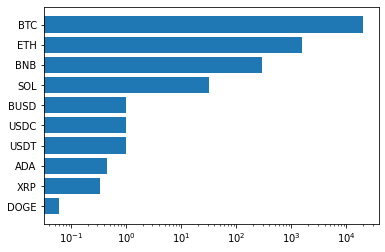

In [21]:
# actualizamos el df
df = cripto_scraper()
df

**Otorgar acceso desde Google Colab**

* En caso de acceder desde Google Colab resulta más sencillo autenticarse dado que lo hace automaticamente con la cuenta linkeada.

* Una vez que ya tenemos nuestro objeto ```gc``` podemos trabajar usando los mismos métodos que en el caso local.

In [ ]:
# Autenticarse con Colab
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
gc

## **Envio automatico de e-mails**

En esta sección haremos un ejemplo de como enviar mails desde Python 

### **Protocolo SMTP**
El protocolo para transferencia simple de correo (en inglés: Simple Mail Transfer Protocol o SMTP) es un protocolo de red utilizado para el intercambio de mensajes de correo electrónico entre computadoras u otros dispositivos (PDA, teléfonos móviles, impresoras, etcétera).

### Usando Python

1. Ir a https://myaccount.google.com/apppasswords y crear una contraseña de app
2. En la parte inferior, hacer clic en **Seleccionar aplicación** y elegir la aplicación que estás usando. 
3. Haga clic en Seleccionar dispositivo y elegir el dispositivo que está utilizando. También se puede poner un nombre personalizado.
4. Hacer click en Generar.




In [72]:
import os
import smtplib
from email.message import EmailMessage


DESTINATARIO = usuario # mail@mail.com
CUERPO_DEL_MAIL = 'Este es un mail enviado con Python en el taller de Humai! =D'

msg = EmailMessage()

# Contenido
msg['From']="curso_de_automatizacion_de_humai@gmail.com"
msg['To']= DESTINATARIO
msg['Subject']= "Probando mandar mails!"
msg.set_content(CUERPO_DEL_MAIL)

# No se queden en los detalles aquí, pero pueden leer más sobre
#el protocolo SMTP acá: https://es.wikipedia.org/wiki/Protocolo_para_transferencia_simple_de_correo 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()

# Usuario y contraseña
USER = usuario
PASSWORD = contrasena

server.login(USER, PASSWORD)


# enviar
server.send_message(msg)
server.quit();
print('Mail enviado')

Mail enviado


### Enviar más de un mail

Podría existir el caso de uso donde querramos enviar más de un mail. Por ejemplo a todes nuestres alumnes con la nota de su parcial.

In [78]:
import smtplib
from email.message import EmailMessage
import time

notas  = [10, 8 , 7]
alumnes = ['Lupe', 'Juan', 'Sofia']
mails = ['Juan@mail.com', 'Sofia@mail.com', 'Lupe@mail.com']

with smtplib.SMTP('smtp.gmail.com', 587) as server:
  for i in range(len(notas)):
    # Contenido
    msg = EmailMessage()

    msg['From']="curso_de_automatizacion_de_humai@gmail.com"
    msg['To']= usuario# Obviamente habria que ir variando los mails, aca no lo voya hacer pero seria poner mails[i]
    msg['Subject']= "Probando mandar mails!"
    cuerpo_del_mail = f'Hola {alumnes[i]}, tu nota en el parcial fue de {notas[i]}.\n\nSaludos!'
    msg.set_content(cuerpo_del_mail)
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(USER, PASSWORD)

    # enviar
    server.send_message(msg)
    time.sleep(3)
    print(f'mail enviado a {alumnes[i]}')

mail enviado a Lupe
mail enviado a Juan
mail enviado a Sofia


### Enviar archivos adjuntos

Podemos agregar archivos adjuntos como por ejemplo imágenes o PDFs.

In [29]:
!wget -O humai_logo.png https://humai.com.ar/static/logos/ISOTIPO.png

--2022-08-30 14:15:28--  https://humai.com.ar/static/logos/ISOTIPO.png
Resolving humai.com.ar (humai.com.ar)... 18.190.92.144
Connecting to humai.com.ar (humai.com.ar)|18.190.92.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17855 (17K) [image/png]
Saving to: ‘humai_logo.png’

humai_logo.png      100%[===================>]  17.44K  --.-KB/s    in 0s      

2022-08-30 14:15:28 (227 MB/s) - ‘humai_logo.png’ saved [17855/17855]



In [76]:
# Enviar archivos adjuntos

import smtplib
# El módulo imghdr determina el tipo de imagen contenida en un archivo.
import imghdr
from email.message import EmailMessage

msg = EmailMessage()

# Contenido
msg['From']="curso_de_automatizacion_de_humai@gmail.com"
msg['To']= usuario #usuario@mail.com
msg['Subject']= "Probando mandar mails!"
cuerpo_del_mail = 'Te estoy enviando una imagen con Python! =D'
msg.set_content(cuerpo_del_mail)

path_imagen = '/content/humai_logo.png' 

with open(path_imagen, 'rb') as f:
    image_data = f.read()
    # Para saber el tipo de archivo
    image_type = imghdr.what(f.name)
    image_name = f.name

msg.add_attachment(image_data, maintype='image', subtype=image_type, filename=image_name)

# No se queden en los detalles aquí, pero pueden leer más sobre el protocolo SMTP acá: https://es.wikipedia.org/wiki/Protocolo_para_transferencia_simple_de_correo 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()

# Usuario y contraseña
USER = usuario
PASSWORD = contrasena

server.login(USER, PASSWORD)

# enviar
server.send_message(msg)
print('Mail enviado')
server.quit();


Mail enviado


## Reportes automatizados en formato .docx

In [49]:
!pip install python-docx -q
from docx import Document
# from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH


from datetime import date

     |████████████████████████████████| 5.6 MB 31.5 MB/s 


In [50]:
def add_df_to_doc(df, doc, name='default_name'):
    """Agrega una tabla al archivo .docx"""
    
    # fila extra para poder agregar el "header"
    t = doc.add_table(df.shape[0]+1, df.shape[1])

    # Agreagar el header
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    # Agregar el resto del dataframe
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])

    # save the doc
    doc.save(name)

In [51]:
# plt.rcParams.update({'font.size': 16}) # must set in top
NOMBRE_DE_ARCHIVO = 'prueba.docx'
FECHA_ACTUAL = str(date.today().strftime('%d/%m/%Y'))
MONEDA_MAS_CARA = df.sort_values('Price (USD)',ascending=False)['Name'][0]

document = Document()

document.add_heading('Tabla de precios cripto', 0)

PARRAFO = f"""
Reporte generado automáticamente usando Python el {FECHA_ACTUAL} con datos de https://investing.com/crypto/
"""
p = document.add_paragraph(PARRAFO)
p.alignment = WD_ALIGN_PARAGRAPH.CENTER

item1 = document.add_paragraph(
    'La moneda con mayor valor es ', style='List Bullet'
)

item1.add_run(f'{MONEDA_MAS_CARA}.').italic = True

item2 = document.add_paragraph(
    f'Se obtuvo el valor de {df.shape[0]} monedas', style='List Bullet'
)

document.add_picture('precio_criptos.png')
document.add_page_break()


document.save(NOMBRE_DE_ARCHIVO)
add_df_to_doc(df, document, NOMBRE_DE_ARCHIVO)

 ## ¿Y si queremos enviar por mail este archivo?

In [60]:
# Enviar archivos adjuntos

import smtplib
from email.message import EmailMessage

msg = EmailMessage()

# Contenido
msg['From']="curso_de_automatizacion_de_humai@gmail.com"
msg['To']= usuario
msg['Subject']= "Probando mandar mails!"
cuerpo_del_mail = 'Te estoy enviando una imagen con Python! =D'
msg.set_content(cuerpo_del_mail)

path_doc = '/content/prueba.docx' 

with open(path_doc, 'rb') as f:
    doc_data = f.read()
    doc_name = f.name

msg.add_attachment(doc_data, maintype='application', subtype='docx', filename=doc_name)

# No se queden en los detalles aquí, pero pueden leer más sobre el protocolo SMTP acá: https://es.wikipedia.org/wiki/Protocolo_para_transferencia_simple_de_correo 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()

# Usuario y contraseña
USER = usuario
PASSWORD = contrasena

server.login(USER, PASSWORD)

# enviar
server.send_message(msg)
print('Mail con archivo adjunto enviado')
server.quit();


Mail con archivo adjunto enviado


## Trabajando con PDFs



In [79]:
!wget -O ejemplo.pdf http://www.africau.edu/images/default/sample.pdf

--2022-08-30 14:57:52--  http://www.africau.edu/images/default/sample.pdf
Resolving www.africau.edu (www.africau.edu)... 104.196.162.239
Connecting to www.africau.edu (www.africau.edu)|104.196.162.239|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3028 (3.0K) [application/pdf]
Saving to: ‘ejemplo.pdf’

ejemplo.pdf         100%[===================>]   2.96K  --.-KB/s    in 0s      

2022-08-30 14:57:52 (498 MB/s) - ‘ejemplo.pdf’ saved [3028/3028]



In [80]:
# instalamos la librería que vamos a utilizar
!pip install textract -q

     |████████████████████████████████| 103 kB 35.2 MB/s 
     |████████████████████████████████| 69 kB 7.3 MB/s 
     |████████████████████████████████| 10.1 MB 75.0 MB/s 
     |████████████████████████████████| 32.8 MB 1.2 MB/s 
     |████████████████████████████████| 5.6 MB 66.6 MB/s 
     |████████████████████████████████| 106 kB 99.5 MB/s 
     |████████████████████████████████| 2.3 MB 60.0 MB/s 
     |████████████████████████████████| 112 kB 60.0 MB/s 
     |████████████████████████████████| 128 kB 59.7 MB/s 
     |████████████████████████████████| 73 kB 3.5 MB/s 
     |████████████████████████████████| 149 kB 56.6 MB/s 
     |████████████████████████████████| 70 kB 8.2 MB/s 
     |████████████████████████████████| 336 kB 63.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
google-api-python

In [81]:
import textract

In [82]:
ARCHIVO = 'ejemplo.pdf'

text = textract.process(f'/content/{ARCHIVO}').decode()

print(text)

 A Simple PDF File 

 This is a small demonstration .pdf file - 

 just for use in the Virtual Mechanics tutorials. More text. And more 
 text. And more text. And more text. And more text. 

 And more text. And more text. And more text. And more text. And more 
 text. And more text. Boring, zzzzz. And more text. And more text. And 
 more text. And more text. And more text. And more text. And more text. 
 And more text. And more text. 

 And more text. And more text. And more text. And more text. And more 
 text. And more text. And more text. Even more. Continued on page 2 ...

 Simple PDF File 2 

 ...continued from page 1. Yet more text. And more text. And more text. 
 And more text. And more text. And more text. And more text. And more 
 text. Oh, how boring typing this stuff. But not as boring as watching 
 paint dry. And more text. And more text. And more text. And more text. 
 Boring.  More, a little more text. The end, and just as well. 




### Un PDF un poco mas complejo

In [83]:
!wget -O paper.pdf https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

--2022-08-30 14:58:16--  https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf
Resolving proceedings.neurips.cc (proceedings.neurips.cc)... 198.202.70.94
Connecting to proceedings.neurips.cc (proceedings.neurips.cc)|198.202.70.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569417 (556K) [application/pdf]
Saving to: ‘paper.pdf’

paper.pdf           100%[===================>] 556.07K  1.60MB/s    in 0.3s    

2022-08-30 14:58:17 (1.60 MB/s) - ‘paper.pdf’ saved [569417/569417]



In [84]:
ARCHIVO = 'paper.pdf'

text = textract.process(f'/content/{ARCHIVO}').decode()

print(text[:20])

Attention Is All You


In [85]:
!pip install pymupdf -q

     |████████████████████████████████| 8.8 MB 10.6 MB/s 


In [86]:
import fitz
import PIL.Image
import io


In [87]:
# Extraemos imagenes 

pdf = fitz.open('paper.pdf')
cant_imagenes = 0

for i in range(len(pdf)):
  pagina = pdf[i]
  imagenes = pagina.get_images()
  for imagen in imagenes:
    imagen_base = pdf.extract_image(imagen[0])
    datos_imagen = imagen_base['image']
    img = PIL.Image.open(io.BytesIO(datos_imagen))
    extension = imagen_base['ext']
    img.save(open(f'imagen_{cant_imagenes}.{extension}', 'wb'))
    cant_imagenes += 1

In [ ]:
# Extraemos tablas


In [88]:
!pip install tabula-py -q

     |████████████████████████████████| 12.0 MB 34.0 MB/s 


In [90]:
from tabula.io import read_pdf

tablas = read_pdf('paper.pdf',pages='all')
tablas[1]

Aug 30, 2022 2:59:00 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Aug 30, 2022 2:59:00 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Aug 30, 2022 2:59:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Aug 30, 2022 2:59:00 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Aug 30, 2022 2:59:06 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Aug 30, 2022 2:59:07 PM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,train,PPL,BLEU,params
0,NaN,N,dmodel dff,h,dk,dv,Pdrop,εls,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,steps,(dev),(dev),×106
2,base,6,512 2048,8,64,64,0.1,0.1,NaN,100K,4.92,25.8,65
3,NaN,NaN,NaN,1,512,512,NaN,NaN,NaN,NaN,5.29,24.9,NaN
4,NaN,NaN,NaN,4,128,128,NaN,NaN,NaN,NaN,5.00,25.5,NaN
5,(A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,16,32,32,NaN,NaN,NaN,NaN,4.91,25.8,NaN
7,NaN,NaN,NaN,32,16,16,NaN,NaN,NaN,NaN,5.01,25.4,NaN
8,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,5.16,25.1,58
9,(B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tablas[1]

### Y para crear un PDF?

In [91]:
!python3 -m pip install reportlab -q

     |████████████████████████████████| 2.8 MB 34.6 MB/s 
     |████████████████████████████████| 3.1 MB 60.4 MB/s 


In [92]:
from reportlab.pdfgen import canvas
from datetime import date

FECHA_ACTUAL = str(date.today().strftime('%d/%m/%Y'))

# Se crea un objeto "canvas" que funciona con una hoja a la que podemos acceder mediante ejes
# (0, 0) es la esquina inferior izquierda, "x" va para arriba e "y" hacia la derecha

ARCHIVO = "probando_reportlab.pdf"
my_canvas = canvas.Canvas(ARCHIVO)
my_canvas.drawString(100, 750, "Hola mundo!")
my_canvas.save()



In [93]:
# Complejizando un poco
# Guia de uso: https://docs.reportlab.com/reportlab/userguide/ch1_intro/

my_canvas = canvas.Canvas(ARCHIVO)
my_canvas.setLineWidth(.3)
my_canvas.setFont('Helvetica', 12)
my_canvas.drawString(30, 750, 'COMUNICADO OFICIAL')
my_canvas.drawString(500, 750, f"{FECHA_ACTUAL}")
my_canvas.line(480, 747, 580, 747)
my_canvas.drawString(275, 725, 'CANTIDAD:')
my_canvas.drawString(500, 725, "$1,000.00")
my_canvas.line(378, 723, 580, 723)
my_canvas.drawString(30, 703, 'RECIBIDO POR:')
my_canvas.line(120, 700, 580, 700)
my_canvas.drawString(120, 703, "COSME FULANITO")


my_canvas.drawImage('humai_logo.png', 30, 500, width=100, height=100, mask='auto')

my_canvas.save()

## Scheduling con CRON

En el sistema operativo Unix, cron es un administrador regular de procesos en segundo plano (demonio) que ejecuta procesos o guiones a intervalos regulares (por ejemplo, cada minuto, día, semana o mes). Los procesos que deben ejecutarse y la hora a la que deben hacerlo se especifican en el archivo crontab. 

<img src="https://i.ibb.co/ZWCbc2m/crontab.png" alt="crontab" border="0">


Cron se puede definir como el equivalente a Tareas Programadas de Windows.

<img src='https://www.solvetic.com/uploads/monthly_01_2017/tutorials-9832-0-90051600-1484655732.png'> <br>
Fuente: https://www.solvetic.com/tutoriales/article/3441-como-abrir-y-configurar-programador-tareas-windows-10/





### Comandos básicos de Cron

En la terminal: <br>
**`crontab -l`** -> Permite ver la lista de las tareas programadas <br>
**`crontab -e`** -> Permite ver editar las tareas programadas

<font color='red'><h3>ATENCION! </h3></font>

**`crontab -r`** -> Permite borrar las tareas programadas  <br>
Es importante que lo uses cuando quieras que tu tarea deje de ser ejecutada, sino va a quedar funcionando indefinidamente 

In [ ]:
# ┌───────────── Minutos (0 - 59)
# │ ┌───────────── Hora (0 - 23)
# │ │ ┌───────────── Dia del mes (1 - 31)
# │ │ │ ┌───────────── Mes (1 - 12) o jan,feb,mar,apr,may,jun,jul... (meses en inglés)
# │ │ │ │ ┌─────────────  día de la semana (0-6) (domingo=0 o 7) o sun,mon,tue,wed,thu,fri,sat (días en inglés) 
# │ │ │ │ │                                       
# │ │ │ │ │
# │ │ │ │ │
# * * * * *  comando_a_ejecutar

Algunos ejemplos:

Todos los dias a las 12 y media del mediodia corre esto

`30 12 * * * python /ruta/a/mi/archivo/script.py`

El 10 de cada mes corre esto a las 3 de la tarde

` * 3 10 * * python /ruta/a/mi/archivo/script.py`

Consideraciones
* Dependiendo del intérprete de Python que tengan instalado pueden tener que poner algo distinto a la palabra python. Ejemplo:
` * * * * * python3 /ruta/a/mi/archivo/script.py`

* Otra forma es que cron se posicione en la ruta del archivo y luego solo lo corra. Ejemplo:
`* * * * * cd /ruta/a/mi/archivo && python script.py`


In [ ]:
def escribir_archivo():
	with open('prueba.txt', 'a+') as f:
		f.write('Esribiendo archivo desde Cron\n')
		
if __name__ == '__main__':
	escribir_archivo()

### Recursos

* cron: 
  * [Video de Corey Schafer](https://www.youtube.com/watch?v=QZJ1drMQz1A&t=12s&ab_channel=CoreySchafer) , aunque esta en ingles se los super recomiendo
  * https://crontab.guru/ Ayuda a escribir los comandos de cron

